# 特征缩放/归一化

In [1]:
# 例2-15 特征缩放实例
import pandas as pd
import sklearn.preprocessing as preproc

# 加载在线新闻流行度数据集
df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')

# 查看原始数据——文章中的单词数量
df['n_tokens_content'].values

C:\Users\waitp\AppData\Local\Temp\ipykernel_9620\3957633068.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')


array([219., 255., 211., ..., 442., 682., 157.])

In [2]:
# min-max缩放
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [3]:
# 标准化——注意根据标准化的定义，有些结果会是负的
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [4]:
# L2-归一化
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

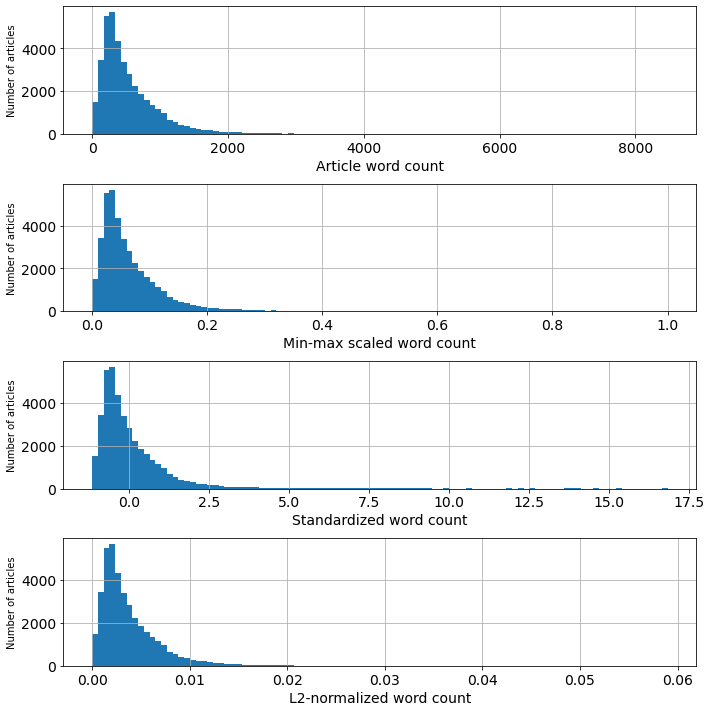

In [9]:
# 例2-16 绘制原始数据和缩放后数据的直方图
# 与对数变换不同，特征缩放不改变分布的形状，只有数据尺度发生了变化

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))
# fig.tight_layout()  # 调整布局-应该放到最后
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles')

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles')

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles')

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles')

fig.tight_layout()  # 调整布局
# plt.tight_layout(h_pad=0.1)

# 只有x轴的尺度发生了变化，特征缩放后的分布形状保持不变

# 特征交互

In [10]:
# 两个特征的乘积可以组成一对简单的交互特征
# 例2-17 预测中的交互特征示例
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

# 假设df是一个Pandas数据框，其中包含了UCI在线新闻流行度数据集
df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')
df.columns

C:\Users\waitp\AppData\Local\Temp\ipykernel_9620\1968497432.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')


Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [16]:
# 选择与内容有关的特征作为模型的单一特征，忽略那些衍生特征
features = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
X = df[features]
y = df[['shares']]

# 创建交互特征对，跳过固定偏移项
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
print(X.shape)
print(X2.shape)  # (39644, 170)

# 为两个特征集创建训练集和测试集
X1_train, X1_test, X2_train, X2_test, y_train, y_test = \
train_test_split(X, X2, y, test_size=0.3, random_state=123)

def evaluate_feature(x_train, x_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(x_train, y_train)
    r_score = model.score(x_test, y_test)

    return model, r_score

# 在两个特征集上训练模型并比较R方分数
m1, r1 = evaluate_feature(X1_train, X1_test, y_train, y_test)
m2, r2 = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

(39644, 17)
(39644, 170)
R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113177799
